# STATS MINI PROJECTS


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

This dataset contains self-reported clothing-fit feedback from customers as well as other 
side information like reviews, ratings, product categories, catalog sizes, customers’ 
measurements (etc.) from 2 websites:
1. Mod Cloth
2. Rent the runway
1. Mod Cloth sells women’s vintage clothing and accessories, from which the 
curator of the dataset collected data from three categories: dresses, tops, and bottoms.
2. Rent The Run Way is a unique platform that allows women to rent clothes for 
various occasions; they collected data from several categories

# Problem Statement:

Let’s assume you are working as a data scientist in a newly started textile company. 
You have given a dataset that consists of most of the features related to the 
measurements, clothes types, Product ID, User ID, etc. Now you suppose to work the 
dataset to identify the patterns to understand the customer’s preferred brands and how 
the company needs to brand its products based on the patterns that you will be found 
them out. Explore all the EDA concepts you learned and use a statistical test to ensure 
that your identification is true or false.

# Questions

1. Read the datasets, Check the data types and Change the data types appropriately.

In [2]:
import pandas as pd
import numpy as np
import json
f=open('modcloth_final_data.json')
s=f.read().strip()
xf=s.split('\n')
nl=[]
for i in xf:
    d=json.loads(i)
    nl.append(d)
df=pd.json_normalize(nl)
df.head(5)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()
df['hips']=df['hips'].astype('float64')

In [4]:
# df['height']=df['height'].astype('float64')

In [5]:
#df['shoe_size'].astype('float64')

In [6]:
df.dtypes

item_id            object
waist              object
size                int64
quality           float64
cup size           object
hips              float64
bra size           object
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id            object
shoe size          object
shoe width         object
review_summary     object
review_text        object
dtype: object

2. Change the height column datatype to float after converting the values as shown Below. 5.7

In [7]:
def hi(i):
    if type(i)==str:
        if len(i)>3:
            q=i.split()
            return float(q[0][0]+'.'+q[1][:-2])
        else:
            return float(i[0])
    else:
        return np.NaN
df['height']=df['height'].apply(hi)
df

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29,7,5.0,d,38.0,34,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30.0,36,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5.7,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36,outerwear,NaN,5.8,Jennifer,just right,fit,727820,8.50,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34,outerwear,NaN,5.5,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32,outerwear,NaN,5.4,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5.3,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


3. Rename the names of the columns which have space in between the column.
Ex: shoe size as shoe_size etc.

In [8]:
df.rename(columns=lambda x:x.replace(' ','_'),inplace=True)
df

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29,7,5.0,d,38.0,34,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30.0,36,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5.7,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36,outerwear,NaN,5.8,Jennifer,just right,fit,727820,8.50,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34,outerwear,NaN,5.5,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32,outerwear,NaN,5.4,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5.3,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


4. Check the missing values and Identify the distribution of the variables to impute the
missing values. Explain based on your analysis decide the features which can be 
dropped and Which can be imputed. And also explain the reason to choose the 
metric that you have chosen to impute the null values

Note: Kindly copy the datasets and work on the new data frame.

4.1 Check the count and percentage of missing values.

In [9]:
dfn=df
dfc=dfn.isnull().sum().to_frame()
dfc.rename(columns= lambda x:'count',inplace=True)
dfc['percentage_of_missing values']=round(dfc['count']/len(df)*100,2)
dfc

,count,percentage_of_missing values
item_id,0,0.00
waist,79908,96.52
size,0,0.00
quality,68,0.08
cup_size,6255,7.56
hips,26726,32.28
bra_size,6018,7.27
category,0,0.00
bust,70936,85.68
height,1107,1.34


4.2 check the Mean and Median.

In [10]:
print(df.mean())
print(df.median())

item_id          inf
size       12.661602
quality     3.949058
hips       40.358501
height      5.456365
user_id          inf
dtype: float64
item_id      454030.0
waist            30.0
size             12.0
quality           4.0
hips             39.0
bra_size         36.0
height            5.5
user_id      497913.5
shoe_size         8.0
dtype: float64


4.3 Check the distribution of the variables using Histogram or Dist plot or KDE 
and boxplot etc.
Kindly explore at least two.

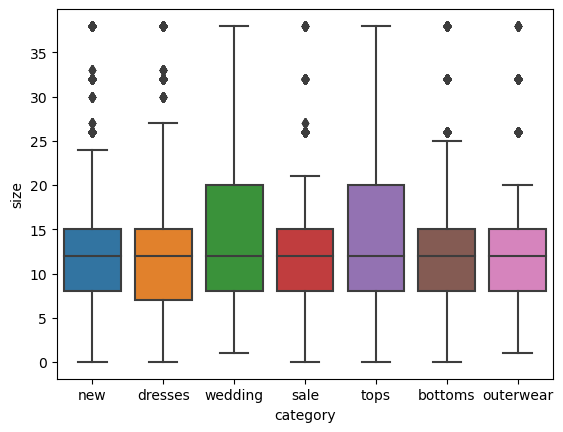

<AxesSubplot:xlabel='height', ylabel='shoe_size'>

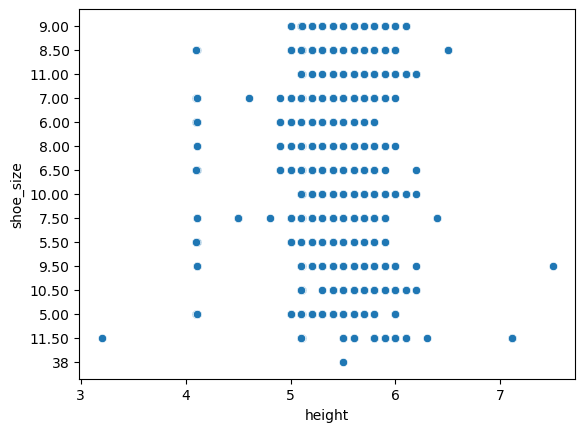

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['category'],df['size'])
plt.show()
sns.scatterplot(df['height'],df['shoe_size'])

4.4 Check the Skewness and Kurtosis.
Explain what the Skewness and Kurtosis describe.

In [12]:
print(df.skew())
print(df.kurt())
df1=df


item_id     -0.120644
waist        0.993061
size         1.128301
quality     -0.676777
hips         0.969187
bra_size     0.901004
height      -1.095275
user_id      0.008201
shoe_size    0.436713
dtype: float64
item_id     -1.215909
waist        0.836624
size         0.760010
quality     -0.167085
hips         0.848464
bra_size     1.039445
height       5.311308
user_id     -1.182436
shoe_size    8.448820
dtype: float64


4.5 Based on the above approach impute the missing values with the right 
metric. Or If you want to get some analysis before imputing missing values 
feel free to explore the analysis

In [13]:
df.drop(columns=['waist','bust'],axis=1, inplace=True)

In [14]:
df['quality']=df.groupby(['category','fit'])['quality'].transform(lambda x:x.fillna(x.mode().iloc[0]))

In [15]:
df['bra_size'].fillna(np.random.choice([32,34,36,38],p=[0.15,0.20,0.30,0.35]),inplace=True)

In [16]:
df['cup_size']=df.groupby('bra_size')['cup_size'].transform(lambda x:x.fillna(x.mode().iloc[0]))

In [17]:
def sz(i):
    if i<30:
        return 'xs'
    elif i>=30 and i<=34:
        return 's'
    elif i>=35 and i<=38:
        return 'm'
    elif i>=39 and i<=42:
        return 'l'
    elif i>=43 and i<=48:
        return 'xl'
    elif i>=49 and i<=52:
        return 'xxl'
    elif i>52:
        return 'Free size'
    else:
        return np.NaN

In [18]:
df['hips_bar']=df['hips'].apply(sz)
df['hips_bar']=df.groupby(['category','fit','quality'])['hips_bar'].transform(lambda x:x.fillna(x.mode().iloc[0]))

In [19]:
df['height']=df['height'].fillna(df['height'].mean())

In [20]:
df['length']=df.groupby(['quality','fit'])['length'].transform(lambda x:x.fillna(x.mode().iloc[0]))

In [21]:
df['review_text']=df['review_text'].fillna('NOT PROVIDED')
df

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,hips_bar
0,123373,7,5.0,d,38.0,34,new,5.600000,Emily,just right,small,991571,NaN,NaN,NaN,NOT PROVIDED,m
1,123373,13,3.0,b,30.0,36,new,5.200000,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NOT PROVIDED,s
2,123373,7,2.0,b,NaN,32,new,5.700000,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NOT PROVIDED,m
3,123373,21,5.0,dd/e,NaN,36,new,5.456365,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NOT PROVIDED,m
4,123373,18,5.0,b,NaN,36,new,5.200000,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NOT PROVIDED,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,NaN,36,outerwear,5.800000,Jennifer,just right,fit,727820,8.50,average,Cute jacket!,Cute jacket!,m
82786,807722,12,5.0,ddd/f,NaN,34,outerwear,5.500000,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,m
82787,807722,12,5.0,dddd/g,36.0,32,outerwear,5.400000,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...,m
82788,807722,12,4.0,c,NaN,36,outerwear,5.300000,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,m


In [22]:
df['review_summary']=df['review_summary'].fillna('NOT PROVIDED')
df

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,hips_bar
0,123373,7,5.0,d,38.0,34,new,5.600000,Emily,just right,small,991571,NaN,NaN,NOT PROVIDED,NOT PROVIDED,m
1,123373,13,3.0,b,30.0,36,new,5.200000,sydneybraden2001,just right,small,587883,NaN,NaN,NOT PROVIDED,NOT PROVIDED,s
2,123373,7,2.0,b,NaN,32,new,5.700000,Ugggh,slightly long,small,395665,9.00,NaN,NOT PROVIDED,NOT PROVIDED,m
3,123373,21,5.0,dd/e,NaN,36,new,5.456365,alexmeyer626,just right,fit,875643,NaN,NaN,NOT PROVIDED,NOT PROVIDED,m
4,123373,18,5.0,b,NaN,36,new,5.200000,dberrones1,slightly long,small,944840,NaN,NaN,NOT PROVIDED,NOT PROVIDED,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,NaN,36,outerwear,5.800000,Jennifer,just right,fit,727820,8.50,average,Cute jacket!,Cute jacket!,m
82786,807722,12,5.0,ddd/f,NaN,34,outerwear,5.500000,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,m
82787,807722,12,5.0,dddd/g,36.0,32,outerwear,5.400000,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...,m
82788,807722,12,4.0,c,NaN,36,outerwear,5.300000,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,m


In [23]:
#dropping  shoe size 38 which is an outlier
df.drop(index=37314,inplace=True,axis=0)

5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3.

In [24]:
def iq(i):
    q1=df[str(i)].quantile(0.25)
    q3=df[str(i)].quantile(0.75)
    IQR=q3-q1
    return (q1,q3,IQR)
q1,q3,IQR=iq('height')
x=2.5*IQR # which is 10 inches
ll=4.5
ul=6.5
df[(df['height']<ll)|(df['height']>ul)]

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,hips_bar
68,124124,15,3.0,a,42.0,36,new,4.11,serrentijess,just right,large,557828,NaN,NaN,NOT PROVIDED,NOT PROVIDED,l
80,124124,20,3.0,dd/e,35.0,42,new,4.10,feesome,slightly long,large,33006,NaN,NaN,NOT PROVIDED,NOT PROVIDED,m
108,124124,4,3.0,c,38.0,34,new,4.11,Samantha,just right,fit,707449,NaN,NaN,NOT PROVIDED,NOT PROVIDED,m
328,125442,5,3.0,b,34.0,32,new,4.11,Cecile,just right,fit,731815,5.00,average,NOT PROVIDED,NOT PROVIDED,s
360,125442,11,4.0,dddd/g,NaN,34,new,4.11,cangelone1988,just right,fit,397385,NaN,NaN,NOT PROVIDED,NOT PROVIDED,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,806479,8,5.0,b,NaN,34,outerwear,4.11,juliea.whitehead,just right,fit,301563,NaN,wide,I am a very petite person,"I am a very petite person at 4'11, but I love ...",m
82087,806856,1,5.0,a,35.0,32,outerwear,4.10,Kathrine,just right,large,659737,6.00,NaN,Beautiful and warm coat.,Beautiful and warm coat. I get so many complim...,m
82338,806856,4,5.0,aa,32.0,32,outerwear,4.11,cailin.doiel06,slightly long,fit,983495,NaN,NaN,This is a really nice win,"This is a really nice winter coat, definitely ...",s
82452,806856,8,4.0,c,NaN,36,outerwear,4.11,ecruces,slightly long,large,258780,NaN,NaN,Warmer and thicker than e,Warmer and thicker than expected.,m


In [25]:
def IQ(i):
    q1=df[str(i)].quantile(0.25)
    q3=df[str(i)].quantile(0.75)
    IQR=q3-q1
    #return (q3,q1,IQR)
    ul=q3+(2.5*IQR)
    ll=q1-(2.5*IQR)
    print(type(ll),ll,ul)
    return df[(df[str(i)]<ll)|(df[str(i)]>ul)]
IQ('size')

<class 'numpy.float64'> -9.5 32.5


,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,hips_bar
11,123373,33,5.0,ddd/f,60.0,44,new,5.4,tera.oh,just right,small,422613,NaN,NaN,NOT PROVIDED,NOT PROVIDED,Free size
107,124124,38,4.0,c,NaN,36,new,5.5,candlecrazy80,slightly short,small,737821,NaN,NaN,NOT PROVIDED,NOT PROVIDED,l
129,124124,38,3.0,dd/e,54.0,42,new,5.9,natalie.lestrange,just right,large,293138,NaN,NaN,NOT PROVIDED,NOT PROVIDED,Free size
152,124124,38,5.0,dd/e,59.0,46,new,5.6,paige.janzen,just right,fit,346932,NaN,NaN,NOT PROVIDED,NOT PROVIDED,Free size
210,124124,38,4.0,c,NaN,36,new,5.7,Melanie,just right,fit,179658,NaN,NaN,NOT PROVIDED,NOT PROVIDED,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81028,803464,38,5.0,h,48.0,36,outerwear,5.4,Jo,slightly long,large,151667,10.00,average,Nice blazer but waaaaay t,Nice blazer but waaaaay too big.,xl
81030,803464,38,3.0,dddd/g,54.0,46,outerwear,5.1,jacque_derwey,slightly short,large,604255,NaN,NaN,Very boxy fit,Very boxy fit,Free size
81031,803464,38,4.0,dd/e,57.0,44,outerwear,5.4,homie4310,just right,fit,657060,NaN,NaN,Beautiful blazer! I haven,Beautiful blazer! I haven't been able to find ...,Free size
81186,803768,38,4.0,c,52.0,40,outerwear,5.8,Jamie,just right,large,526518,NaN,NaN,Love it! The lining isn',"Love it! The lining isn't that soft, but I lo...",xxl


In [26]:
IQ('hips')

<class 'numpy.float64'> 18.5 60.5


,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,hips_bar


6. Check for the category dress review and visualize the top 10 reviews using any 
relevant plot. Identify the negative reviews if there are any

In [27]:
df[(df['category']=='dresses')&(df['quality']<2)&((df['fit']=='small')|(df['fit']=='large'))]['review_text']

8551     I purchased this about a month ago. It FINALLY...
8794                           Low quality for fifty bucks
9495     I was really excited about this dress when I f...
9605     Many reviews said that this dress was a differ...
9703       Awful!  So scratchy and didn't fit well at all!
                               ...                        
27657    I thought I'd love this dress because of the c...
27768                                  Returned right away
27790     It's an ok dress. It looks very cheap in person.
28101    The pattern was really pretty, but the quality...
28279    I've wanted this dress forever. Unfortunately ...
Name: review_text, Length: 139, dtype: object

7. Find out the average shoe size for the different fits of the customer. Visualize 
using any relevant plot. Explain that, Is there any significant different shoe sizes for 
different fits ?

In [28]:
df['shoe_size']=df['shoe_size'].astype('float64',copy=True)
d=pd.pivot_table(df1,index=['fit'],values=['shoe_size'],aggfunc='mean')
d

,shoe_size
fit,
fit,8.097027
large,8.208501
small,8.299320


<AxesSubplot:xlabel='fit', ylabel='shoe_size'>

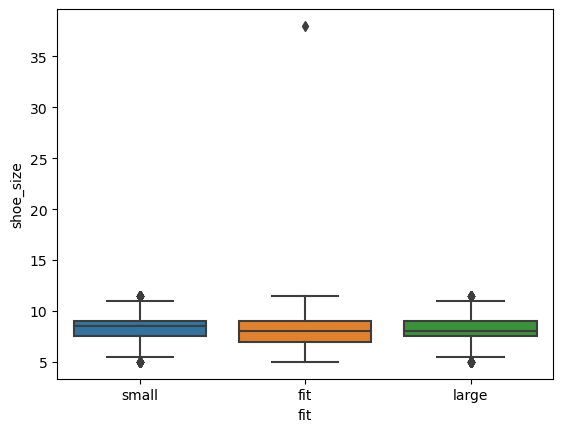

In [29]:
sns.boxplot(df['fit'],df['shoe_size'].astype('float'))

8. Identify the customer’s common shoe width and average size for those who 
purchased the maximum quality. Is the mode of shoe width affect the user review?
Visualize using the appropriate plot.

In [30]:
yf=df[df['quality']==5]
pd.pivot_table(yf,index=['shoe_width'],values=['shoe_size'],aggfunc='mean')

,shoe_size
shoe_width,
average,8.096427
narrow,7.763069
wide,8.463816


9. Extract the records belonging to the top 10 reviews, and then find the review 
summary for the different cup sizes. The basic analysis explains what you would try to 
infer. Try to use visualization.

In [31]:
l=df['review_summary'].value_counts().head(10).to_frame().index
xf=df[(df['review_summary']==l[0])|(df['review_summary']==l[1])|(df['review_summary']==l[2])|(df['review_summary']==l[3])|(df['review_summary']==l[4])|(df['review_summary']==l[5])|(df['review_summary']==l[6])|(df['review_summary']==l[7])|(df['review_summary']==l[8])|(df['review_summary']==l[9])]
pd.crosstab(xf['cup_size'],xf['review_summary'])


review_summary,.,I absolutely love this dr,I get so many compliments,I love this dress so much,I really wanted to love t,Love it,Love it!,NOT PROVIDED,Perfect!,This is one of my favorit
cup_size,,,,,,,,,,
a,7,9,5,6,7,5,10,389,7,11
aa,0,1,1,1,0,0,0,28,2,0
b,14,15,6,11,15,18,31,1146,13,14
c,32,29,24,28,29,29,60,1906,15,25
d,8,33,11,13,16,19,37,1397,13,16
dd/e,5,17,16,14,13,12,23,1060,14,8
ddd/f,4,7,6,6,10,6,18,484,4,7
dddd/g,6,8,1,1,2,1,3,188,1,2
h,0,3,0,1,0,2,1,96,0,0


10. Identify the most common review that we got from the customer whose hips size 
is greater than 35. Find out what kind of inference you can make

In [32]:
df[df['hips']>35]['review_summary'].value_counts().head(1)

NOT PROVIDED    3527
Name: review_summary, dtype: int64

11. What is the relationship between height and weight? Describe what kind of 
relationship it has

# weight is not provided in data Set

12. Plot the pair plot for the numerical plot. Explain according to your problem 
statement how the pair plot would help you.

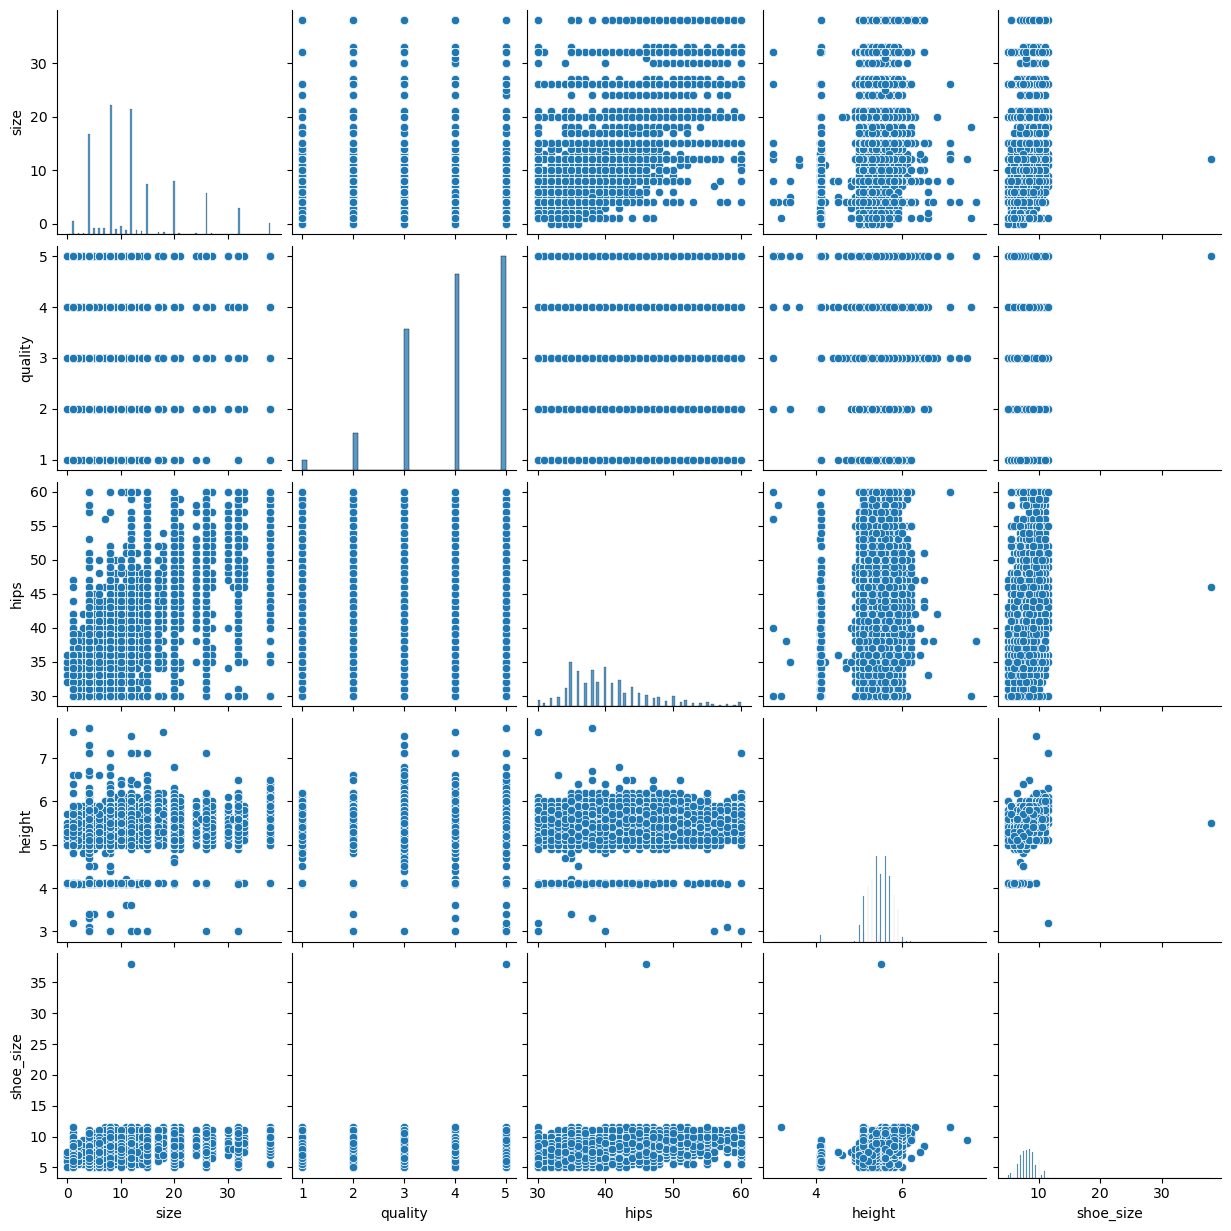

In [33]:
import seaborn as sns
sns.pairplot(df)

# Statistical Analysis

In [34]:
df.info()
df['size'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82789 entries, 0 to 82789
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82789 non-null  object 
 1   size            82789 non-null  int64  
 2   quality         82789 non-null  float64
 3   cup_size        82789 non-null  object 
 4   hips            56063 non-null  float64
 5   bra_size        82789 non-null  object 
 6   category        82789 non-null  object 
 7   height          82789 non-null  float64
 8   user_name       82789 non-null  object 
 9   length          82789 non-null  object 
 10  fit             82789 non-null  object 
 11  user_id         82789 non-null  object 
 12  shoe_size       27915 non-null  float64
 13  shoe_width      18607 non-null  object 
 14  review_summary  82789 non-null  object 
 15  review_text     82789 non-null  object 
 16  hips_bar        82789 non-null  object 
dtypes: float64(4), int64(1), object

8     17893
12    17343
4     13883
20     7292
15     6883
26     5656
32     3612
1      1784
38     1461
10     1164
5       851
7       777
6       775
9       737
11      542
13      486
14      364
18      251
17      235
21      201
3       142
24      125
27       94
2        94
30       65
33       46
0        31
31        1
25        1
Name: size, dtype: int64

1. Test the claim that the category feature and review summary have any 
relationship among them. The level of significance is 5%.

In [35]:
import scipy.stats as stat
df['category'].value_counts()
df['review_summary'].value_counts()
#h0:category and review are independant
#h1:category and review are depedant
#cat(>2) vs cat(>2)-chi2_contingency test
pd.crosstab(df['category'],df['review_summary'])
test_stat,pval,ddof,array=stat.chi2_contingency(pd.crosstab(df['category'],df['review_summary']))
sl=0.05
pval<sl
#reject the null hypotheisi

True

2. Test statistically whether the size and hips have any relationship using 0.05 
alpha. Before the above test, Test the normality test.

In [36]:
#normality test
#h0:size and hips are independant
#h1:size and hips are dependant
df['size']=df['size'].astype("float")
z,p2=stat.shapiro(df['size'])#as data has null values we are going with test_stat
p=stat.norm.sf(z)*2
p<0.05 #as it is failed to perform  parametric we will go with non parametric spearmenr
tes_val,p_val=stat.spearmanr(df['size'],df['hips'].notnull())#if we are not using not null cond we will have nan in pval and teststat
p_val<0.05


True

3. Does the quality significantly differ for any one shoe width? Test the test with 
96%confidence intervals.
Check the normality of the data before the above test. Alpha = .05

In [37]:
df['quality'].value_counts()
#cat vs cat
#normality-check
test,pval=stat.shapiro(df['quality'])
p=stat.norm.sf(test)
p<0.05 #as it is failing parametric test we wil go with non parametric  cat vs cat
#ho:quality and shoe_width are independant
#h1:quality and shoe_width are depedant
k=pd.crosstab(df['quality'],df['shoe_width'])
test_stat,pval,ddof,expected_array=stat.chi2_contingency(k)
pval<0.04


True

4. Check if the shoe width feature affects the review summary with a 99% 
confidence interval.

In [38]:
# h0 : shoe width and review summary are dependent
# h1 : shoe width and review summary are independent



In [39]:
import scipy.stats as stats
k=pd.crosstab(df['shoe_width'],df['review_summary'])
test_stat,pval,ddof,array=stats.chi2_contingency(k)
pval<0.01

#  we reject null hypothesis

True

5. Check if the length feature affects the review summary with a 95% confidence
interval.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82789 entries, 0 to 82789
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82789 non-null  object 
 1   size            82789 non-null  float64
 2   quality         82789 non-null  float64
 3   cup_size        82789 non-null  object 
 4   hips            56063 non-null  float64
 5   bra_size        82789 non-null  object 
 6   category        82789 non-null  object 
 7   height          82789 non-null  float64
 8   user_name       82789 non-null  object 
 9   length          82789 non-null  object 
 10  fit             82789 non-null  object 
 11  user_id         82789 non-null  object 
 12  shoe_size       27915 non-null  float64
 13  shoe_width      18607 non-null  object 
 14  review_summary  82789 non-null  object 
 15  review_text     82789 non-null  object 
 16  hips_bar        82789 non-null  object 
dtypes: float64(5), object(12)
memor

In [41]:
import scipy.stats as stats
k=pd.crosstab(df['length'],df['review_summary'])
test_stat,pval,ddof,array=stats.chi2_contingency(k)
pval<0.05

#  we reject null hypothesis

True

6. Does the average quality significantly differ for the different fits? Kindly test the 
relevant hypothesis test by having 0.05 alpha.
Check the normality of the data before the above test. Alpha = .05

In [42]:
#normal -check
#h0:data is normal
#h1:data is not normal
#shapiro test
df.columns
test_stat,pval=stat.shapiro(df['quality'])
pval<0.05
#data is normal
#as data is normal we are going chi2 test
#h0:fit and avgquality are in dependent to each other
#h1::fit and avgquality are not dependent to each other
f=pd.crosstab(df['quality'],df['fit'])
test_stat,pval,ddof,array=stat.chi2_contingency(f)
pval<0.05
#we reject null hypothesis

True